<img src='https://www.reliance-project.eu/wp-content/uploads/2021/03/Asset-8mdpi.svg' alt='Layout' align='left' width='25%'></img> 
<img src='https://media-exp1.licdn.com/dms/image/C560BAQFFDze0s3l-pQ/company-logo_200_200/0?e=2159024400&v=beta&t=jG_sh9NpwE6yc2TspIcL2YUR2X7OBzTrRSu6w7sNYtc' alt='Layout' align='right' width='10%'></img> 

# Jupyter notebook comparing CAMS and air quality measurements

<a href="https://orcid.org/0000-0002-1784-2920">Anne Fouilloux</a>, <a href="https://orcid.org/0000-0002-8763-1643">Jean Iaquinta</a> 

<b>This Jupyter notebook is distributed under <a href="https://choosealicense.com/licenses/mit/">MIT License</a></b>

<div class="alert alert-success alert-info">
<b>This Jupyter notebook shows how compare CAMS with observations such as EBAS data</b>
</div>

This notebook uses the [Copernicus Atmosphere Monitoring](https://ads.atmosphere.copernicus.eu/#!/home) products previously retrieved from the **RELIANCE** datacube resources and compare with observations on selected locations.

- [1. Background](#1.Background)
- [2. Python Packages](#2.Python_Packages)
- [3. RoHUB Authentication](#3.Rohub_Authentication)
- [4. Read CAMS TimeSeries](#4.Read_CAMS)
- [5. Read Observations](#5.Read_Observations)
- [6. Data Analysis and Visualization](#6.Data_Analysis_Visualization)
- [7. Discussion](#7.Discussion)
- [8. Conclusion](#8.Conclusion)
- [9. Research Object in RoHUB](#9.RoHUB)

## <a id=1.Background></a> Background

In this study, we are comparing air quality analysis from [Copernicus Atmosphere Monitoring Service](https://ads.atmosphere.copernicus.eu/) with observations such as EBAS data. 

## <a id=2.Python_Packages></a> Python packages

Additional packages need to be installed to run this Jupyter notebook on default EGI notebook environment

In [24]:
pip install rohub cmcrameri seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import os
import warnings

In [26]:
warnings.filterwarnings('ignore')

## <a id=3.Rohub_Authentication></a> RoHUB Authentication

<div class="alert alert-warning alert-info">
    The following lines of code will show you how to authenticate to <b>RoHUB</b> using your username and password.
    
</div>

### Authenticate
- you need to create two files in your HOME
    - rohub-user: contains your rohub username
    - rohub-pwd: add your password in this file

In [27]:
import rohub

In [28]:
rohub_user = open(os.path.join(os.environ['HOME'],"rohub-user")).read().rstrip()
rohub_pwd = open(os.path.join(os.environ['HOME'],"rohub-pwd")).read().rstrip()
rohub.login(username=rohub_user, password=rohub_pwd)

Logged successfully as annefou@geo.uio.no.


## <a id=4.Read_CAMS></a> Read CAMS Timeseries

In [29]:
import pandas as pd

In [30]:
variables = ['NO2', 'PM2_5', 'O3']

In [45]:
frames = []
for var in variables:
    tmp = pd.read_csv(var + '_timeseries_.csv')
    tmp = tmp.rename({var: 'value'}, axis='columns')
    tmp['variable'] = str(var)
    frames.append(tmp)
dset = pd.concat(frames)
dset

,index,dayofyear,longitude,latitude,value,year,name,variable
0,0,60,10.749988,59.949997,20.149970,2019,Oslo,NO2
1,1,61,10.749988,59.949997,24.040120,2019,Oslo,NO2
2,2,62,10.749988,59.949997,22.647097,2019,Oslo,NO2
3,3,63,10.749988,59.949997,10.649149,2019,Oslo,NO2
4,4,64,10.749988,59.949997,6.273068,2019,Oslo,NO2
...,...,...,...,...,...,...,...,...
4387,117,177,1.649988,61.049997,63.704030,2021,NorwegianSea,O3
4388,118,178,1.649988,61.049997,68.124610,2021,NorwegianSea,O3
4389,119,179,1.649988,61.049997,67.397240,2021,NorwegianSea,O3
4390,120,180,1.649988,61.049997,60.101208,2021,NorwegianSea,O3


## <a id=5.Read_Observations></a> Read Observations

## <a id=6.Data_Analysis_Visualization></a> Data Analysis and Visualization

In [33]:
import seaborn as sns
# Apply the default theme
sns.set_theme()

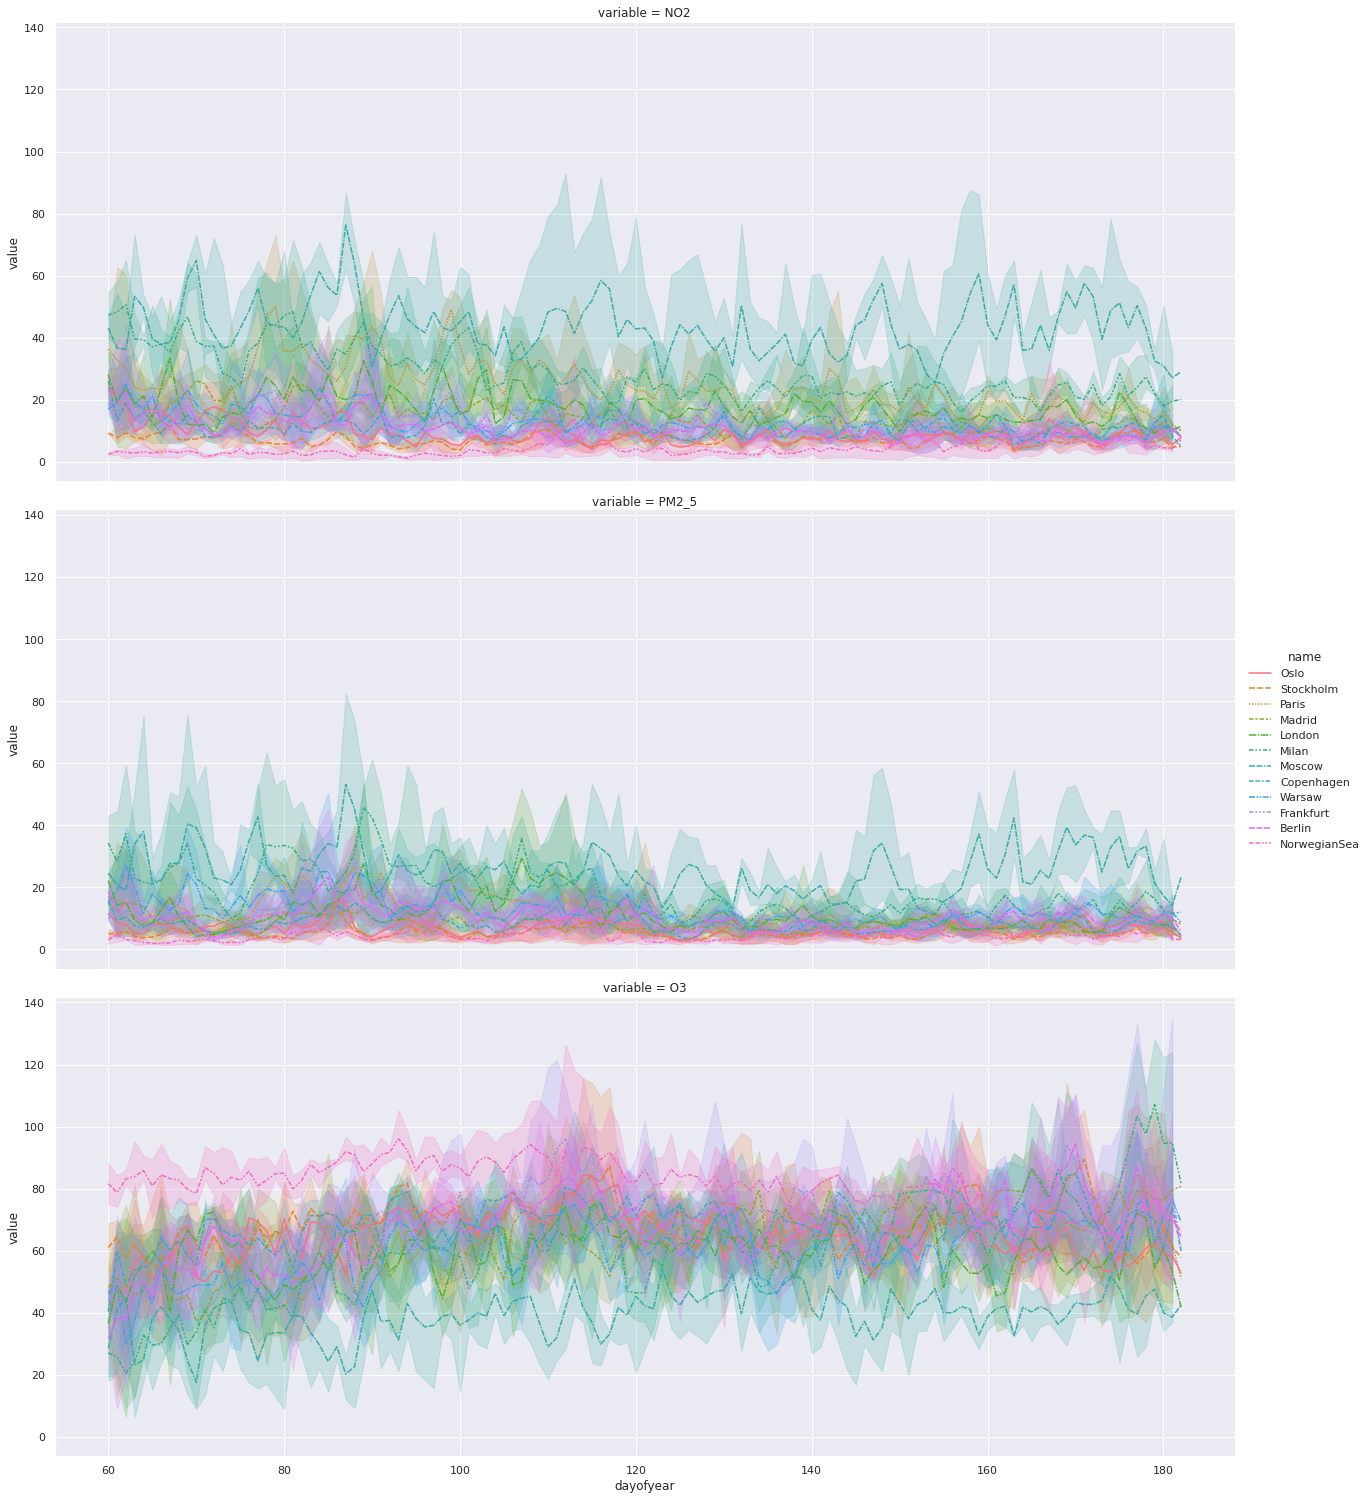

In [49]:
sns.relplot(
    data=dset, kind="line",
    x="dayofyear", y="value", row="variable",
    hue="name", style="name", height=7, aspect=2.5
)

## <a id=7.Discussion></a> Discussion

## <a id=8.Discussion></a> Conclusion

## Research Object in Rohub